# Lesson 3 Notes 

Finally, getting into non-ideal stuff. Considering last notebook with no drag resulted in harmonic motion, I would expect the drag to add some damping to the system, resulting in the classical spring-mass-damper system.

Stop! HANG ON! STAHP!! Weakly damped phugoid motion at altitude is only a slight inconvienance?? This does mean that the phugoidal motions will now be slower to reach the equilibrium point right?? How is that the case? Slight inconveniance to what?? The overall safety and stability of the aircraft? Maybe. To the passenger breastfeeding her child in the bathroom?? MINOR INCONENIANCE MY {bleep!}.

So you can pass functions as parameters...this is different than Java where, Parse.int(a.toString());, because the a.toString() would actually be evaluated first, and then that value would be passted to Parse.int(). Here we are saying something along the lines of recursion, with a function within a function, or rather, something like iphone.dial(){phone.on(); speaker.on(); ... etc. } but with the phone.on() and speaker.on() functions in the parameters.

## Begin Solving 

Note 1: why not just import all of math? Does it load all the functions in the library or only creates a symbolic link such that functions can be accessed through the link?


In [2]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

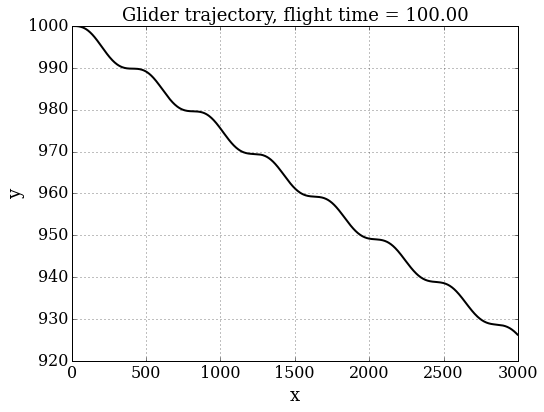

In [3]:
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 30.0   # trim velocity in m s^{-1} - may make this random later in another function, similar to what we did in lesson 2  
C_D = 1/40  # drag coefficient --- or D/L if C_L=1
C_L = 1   # for convenience, use C_L = 1
## NOTE: A quick glance through the rest of the notebook shows C_D/C_L only used once, so instead of two separate variables
## WE can combine them into a single variable that is also randomly generated via rand (random value range through wiki)

### set initial conditions ###
v0 = v_t     # start at the trim velocity (or add a delta)
theta0 = 0 # initial angle of trajectory
x0 = 0     # horizotal position is arbitrary
y0 = 1000  # initial altitude

## defining the f(u) function...decided to do it here to make sure everything recompiles in case values get changed 
## (plus it'll be easier to abstract things away later...)
def f(u):
    '''
    U - vector of state variables
    returns u' - the time derivative of U, as an array
    '''
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                      -g*cos(theta)/v + g/v_t**2*v,
                      v*cos(theta),
                      v*sin(theta)])

## Defining the the euler step, as discussed earlier
def euler_step(u,f,dt):
    return u+f(u)*dt

## setting intial values like before
T = 100                          # final time
dt = 0.1                           # time increment
N = int(T/dt) + 1                  # number of time-steps, need to add one more to include the zero timestep
t = numpy.linspace(0, T, N)      # time discretization, same as last lessons

# initialize the array containing the solution for each time-step
u = numpy.empty((N, 4)) ## tuple sets the shape of u
u[0] = numpy.array([v0, theta0, x0, y0])# fill 1st element with initial values

# time loop - Euler method
for n in range(N-1): # going to N would result in out-of-bounds exception
    u[n+1] = euler_step(u[n], f, dt)
    
# get the glider's position with respect to the time
x = u[:,2] # x is stored in the 3rd column; indexing starts at 0
y = u[:,3] # y is stored in the 4th column; indexing starts at 0

# plotting glider trajectory
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);

## Grid Convergence
This is rather important so pay attention. In order to test convergence without a numerical solution, you actually need an array of solutions to the problem with different timesteps. Similar to how we created an array of single vector solutions in the last lessons (which resulted in a 2-D array), this can be done with an array of multidimensional vectors (a 3-d array). Can this be extended to n+1-D arrays for convergence of a solution in n-space? The world may never know.

Note: we will need to use enumerate(). This function returns an index-value pair, where you control the starting index. Very useful in terms of iteration. It also can be defined as a function, using 'yield' instead of 'return.' What this means is that it creates a generator that generates the index-value pair only once and that result isn't stored in memory, like an array or a list is.

Note: Empty_like essentially creates an empty array with the same dimensions as the array passed to it.

Note: Notice that we use the same initial conditions each time...which ensures we have an accurate comparison

In [4]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt) + 1    # number of time-steps
    t = numpy.linspace(0.0, T, N)
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    for n in range(N-1):
        u[n+1] = euler_step(u[n], f, dt)   ### call euler_step() ###
    u_values[i] = u


### Caveats to Grid Convergence

It is important to realize that you don't actually have an error, since you don't have an exact solution with which to err from... Instead, you err from a reference value. But you have to match times in order to compare solutions accurately. One solution is to only slice off the timesteps needed first and then run a norm to compare. The other is to iterate through the array of solutions using only the current solution and the next solution and build an array of deviations from the reference. From a runtime perspective, the former may be more appropriate, but in terms or reusability, it'll definitely be the latter. 

dt = 0.1
dt = 0.05
dt = 0.01
dt = 0.005
dt = 0.001


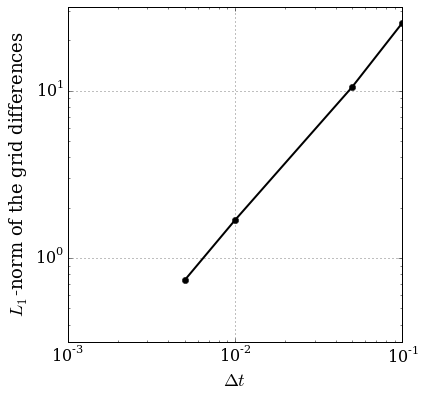

In [6]:
def get_diffgrid(u_current, u_fine, dt):
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid

# Test get_diffgrid
diffgrid = numpy.empty_like(dt_values)
for i, dt in enumerate(dt_values):
    print('dt = {}'.format(dt))
    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)

# Testing successful, run the plots!
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='-', lw=2, marker='o');

### Convergence order
I believe this is the same thing as big-O notation, which describes the behavior of functions at the limits... It also makes sense that the euler method is first order, since it uses first-order equations (i.e. only the first derivative) to approximate the function.

QUESTION: Why did we choose r=2 for this code? does the actual value of r matter? Same questions for h.

Maximum value for r = 316, after which, Math out of domain exceptions occur. At r = 100, p = 1.631. This of course implies that the value chosen for r is very significant. is there a reason for choosing 2?

In [24]:
r = 2
h = 0.001

dt_values2 = numpy.array([h, r*h, r**2*h])

u_values2 = numpy.empty_like(dt_values2, dtype=numpy.ndarray)

diffgrid2 = numpy.empty(2)

for i, dt in enumerate(dt_values2):
    
    N = int(T/dt) + 1   
    
    t = numpy.linspace(0.0, T, N)
    
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])

    for n in range(N-1):

        u[n+1] = euler_step(u[n], f, dt)      
    
    u_values2[i] = u
    

#calculate f2 - f1
diffgrid2[0] = get_diffgrid(u_values2[1], u_values2[0], dt_values2[1])

#calculate f3 - f2
diffgrid2[1] = get_diffgrid(u_values2[2], u_values2[1], dt_values2[2])

# calculate the order of convergence
p = (log(diffgrid2[1]) - log(diffgrid2[0])) / log(r)

print('The order of convergence is p = {:.3f}'.format(p));


The order of convergence is p = 1.014


# Paper Airplane Challenge
So you are trying to find a combination of $\theta_o$ and $v_o$ such that x is maximized when y is sufficently small (y may never approach zero, so it'll be easier to approximate it). Code design considerations:

   * the flight will end when current_y < (10^-6) : This is less than a micrometer away from the floor, which should be sufficient to call it on the floor. At this point, the x value will be at maximum for that particular flight which would correspond to flight distance for that flight.
   * y should start at the same height each time. The timestep should also stay consistent for every flight. Since the total time of flight is unknown, the timestep would just keep iterating until the y condition is met. We will use 0.001 seconds for the timestep (arbitrary)
   * -90 (straight down) <= $\theta_o$ <= 90 (straight up). Going beyond this would mean throwing it up or down, behind you. That's no way to win a Paper Airplane Challenge. Step by .5 angle (arbitrary)
   * 0 mph (no forward velocity) <= $v_o$ <= 90 mph or 40.2336(from: https://www.quora.com/What-is-the-maximum-speed-a-paper-plane-can-be-launched-by-hand). Step by .25 m/s (arbitrary)
   * if L/D is 5.0, $\frac{C_d}{C_L}$ = 0.2
   * let's allow the initial height to be 1 story $\approx$ 4.5 meters (from: https://www.quora.com/Whats-the-height-of-one-storey-in-a-house)
   * let's also start $x_o$ at 0
   * There is no call to test the convergance...We know the Euler method converges with the first order. Here, We'll just display the maximum x value and the corresponding $v_o$ and $\theta_o$ to achieve that. Once we do, if needed, we can rerun the existing notebook above with those values to confirm convergence and plot the flight path.
   
$\therefore u_o = \begin{pmatrix}-90^o \leq \theta_o \leq 90^o\\ 0\frac{m}{s} \leq v_o \leq 40.2336\frac{m}{s}\\y_o = 4.5m\\ x_o = 0m\\\end{pmatrix}, \Delta t = 0.001s$

## Begin coding!! 

In [25]:
# Step 1: Import what you will need
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Step 2: Define your initial conditions and other parameters
g = 9.8      # gravity in m s^{-2}
v_t = 30.0   # trim velocity in m s^{-1}   
drag_lift_ratio = 0.2 # dimensionless, used only in solving equations
v0 =     # create vector of starting values
theta0 = # create vector of starting values
x0 = 0     # horizotal position is arbitrary
y0 = 4.5  # initial altitude (m)

# Step 3: Define helper functions and create loops to solve the equations of motion

# Step 4: Examine your results (Plots are helpful, but not required)

SyntaxError: invalid syntax (<ipython-input-25-923c78e29d09>, line 14)